###Implement a multi-channel 1D deep CNN architecture for the seven-class classification task. The input and the class labels are given in .mat file format. There is a total of 17160 number of instances present in both input and class-label data files. The input data for each instance is a multichannel time series (12-channel) with size as (12 ×800). The class label for each multichannel time series instance is given in the class_label.mat file. You can select the training and test instances using hold- out cross-validation (70% training, 10% validation, and 20% testing). The architecture of the multi- channel deep CNN is given as follows. The number of filters, length of each filter, and number of neurons in the fully connected layers are shown in the following figure. Evaluate individual accuracy and overall accuracy. (Packages such as keras, tensorflow, pytorch for python and MATLAB deep learning toolbox etc. are allowed)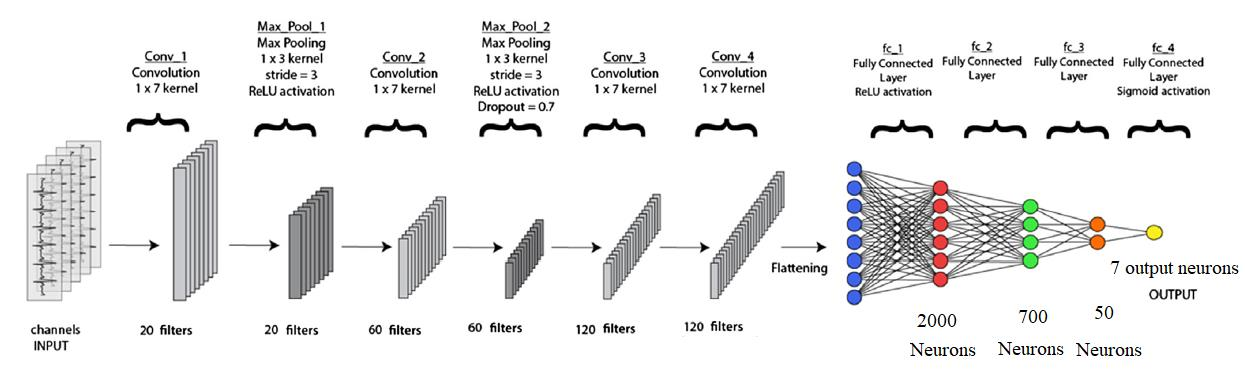

In [ ]:
pip install mat4py

In [ ]:
#Import all the required libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from mat4py import loadmat
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
#Reading the data from the input file
xi=loadmat('/content/drive/MyDrive/NNFL_Assignment2/input.mat')
xi=pd.DataFrame(xi)
xi=np.asarray(xi)

yi=loadmat('/content/drive/MyDrive/NNFL_Assignment2/class_label.mat')
yi=pd.DataFrame(yi)
yi=np.asarray(yi)

In [ ]:
#Handling data to our requirement
x_temp=[]
for i in range(len((xi))):
    x_temp.append(xi[i][0])
x_temp=np.asarray(x_temp).astype(np.float32)
x=x_temp.transpose(0,2,1)

y_temp=[]
for i in range(len((yi))):
    y_temp.append(yi[i][0])
y_temp=np.asarray(y_temp).astype(np.float32)
y=y_temp
enc = preprocessing.OneHotEncoder()
enc.fit(y)
y= enc.transform(y).toarray()

print(x.shape)
print(y.shape)

(17160, 800, 12)
(17160, 7)


In [ ]:
#Splitting our data into Train,Test and Validation sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=2/10,train_size=8/10,shuffle=True)
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,test_size=1/8,train_size=7/8,shuffle=True)
print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)

(12012, 800, 12)
(1716, 800, 12)
(3432, 800, 12)


In [ ]:
#Defining the architecture of our CNN
OneDCNN=models.Sequential()
OneDCNN.add(layers.Conv1D(filters=20,kernel_size=7,strides=1,padding='same',activation='relu',input_shape=(800, 12)))
OneDCNN.add(layers.MaxPooling1D(pool_size=3,strides=3,padding='same'))
OneDCNN.add(layers.Conv1D(filters=60,kernel_size=7,strides=1,padding='same',activation='relu'))
OneDCNN.add(layers.MaxPooling1D(pool_size=3,strides=3,padding='same'))
OneDCNN.add(layers.Dropout(0.7))
OneDCNN.add(layers.Conv1D(filters=120,kernel_size=7,strides=1,padding='same',activation='relu'))
OneDCNN.add(layers.Flatten())
OneDCNN.add(layers.Dense(2000, activation='relu'))
OneDCNN.add(layers.Dense(700))
OneDCNN.add(layers.Dense(50))
OneDCNN.add(layers.Dense(7,activation='sigmoid'))
OneDCNN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 800, 20)           1700      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 267, 20)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 267, 60)           8460      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 89, 60)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 89, 60)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 89, 120)           50520     
_________________________________________________________________
flatten_1 (Flatten)          (None, 10680)            

In [ ]:
#Initializing the optimizer and compiling the CNN on the input data
optimizer=tf.keras.optimizers.Adam(learning_rate=0.000001,decay=0.000001)
OneDCNN.compile(optimizer=optimizer,loss='mse',metrics=['accuracy'])
history = OneDCNN.fit(x_train,y_train,batch_size=32 ,epochs=100, validation_data=(x_valid,y_valid))

Epoch 1/100
376/376 [==============================] - 4s 10ms/step - loss: 0.1736 - accuracy: 0.1840 - val_loss: 0.1581 - val_accuracy: 0.2308
Epoch 2/100
376/376 [==============================] - 3s 9ms/step - loss: 0.1270 - accuracy: 0.2636 - val_loss: 0.1354 - val_accuracy: 0.3730
Epoch 3/100
376/376 [==============================] - 3s 9ms/step - loss: 0.1207 - accuracy: 0.3483 - val_loss: 0.1283 - val_accuracy: 0.4254
Epoch 4/100
376/376 [==============================] - 4s 9ms/step - loss: 0.1169 - accuracy: 0.3928 - val_loss: 0.1235 - val_accuracy: 0.4668
Epoch 5/100
376/376 [==============================] - 3s 9ms/step - loss: 0.1130 - accuracy: 0.4189 - val_loss: 0.1182 - val_accuracy: 0.4866
Epoch 6/100
376/376 [==============================] - 3s 9ms/step - loss: 0.1084 - accuracy: 0.4515 - val_loss: 0.1121 - val_accuracy: 0.5332
Epoch 7/100
376/376 [==============================] - 3s 9ms/step - loss: 0.1033 - accuracy: 0.4916 - val_loss: 0.1055 - val_accuracy: 0.581

In [ ]:
#Outut
test_loss, test_acc = OneDCNN.evaluate(x_test,y_test, verbose=1)
print(test_acc)

108/108 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 0.9921
0.992132842540741


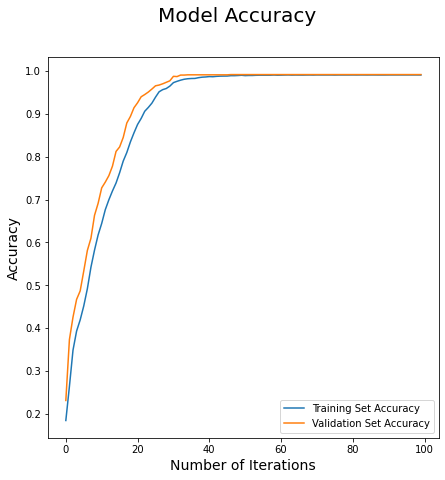

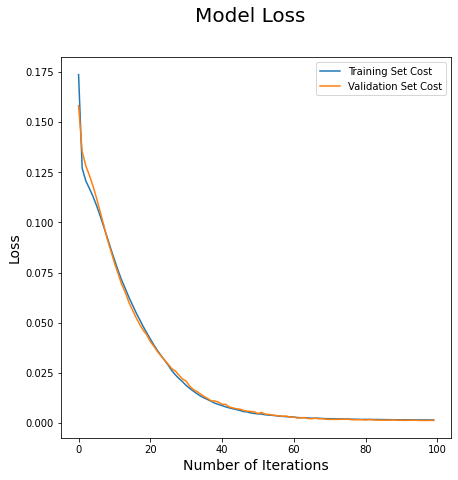

In [ ]:
#The learning rate is taken too low to show the the trend how accuracy and loss are changing
fig=plt.figure()
fig.set_figheight(7)
fig.set_figwidth(7)
fig.suptitle('Model Accuracy', fontsize=20)
plt.xlabel('Number of Iterations', fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.plot(history.history['accuracy'], label = 'Training Set Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Set Accuracy')
plt.legend()

fig=plt.figure()
fig.set_figheight(7)
fig.set_figwidth(7)
fig.suptitle('Model Loss', fontsize=20)
plt.xlabel('Number of Iterations', fontsize=14)
plt.ylabel('Loss',fontsize=14)
plt.plot(history.history['loss'], label = 'Training Set Cost')
plt.plot(history.history['val_loss'], label = 'Validation Set Cost')
plt.legend()